In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg, integrate

Sea 

$v_1$ = $\frac{\mathrm{d}x}{\mathrm{d}t}$, $v_2$ = $\frac{\,{\rm d}y}{\,{\rm d}t}$

entonces

$\frac{\mathrm{d}x}{\mathrm{d}t} = v_1$

$\frac{\mathrm{d}v_1}{\mathrm{d}t} = -GM\frac{x}{r^3}$

$\frac{\mathrm{d}y}{\mathrm{d}t} = v_2$

$\frac{\mathrm{d}v_2}{\mathrm{d}t} = -GM\frac{y}{r^3}$

se puede escribir como

$U_0=x$,
$U_1=v_1$,
$U_2=y$,
$U_3=v_2$

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_0}{\mathrm{d}t}\\
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
U_1\\
-GM\frac{U_0}{r^3}\\
U_3\\
-GM\frac{U_2}{r^3}\\
\end{bmatrix}
\end{equation}





Text(0, 0.5, 'y')

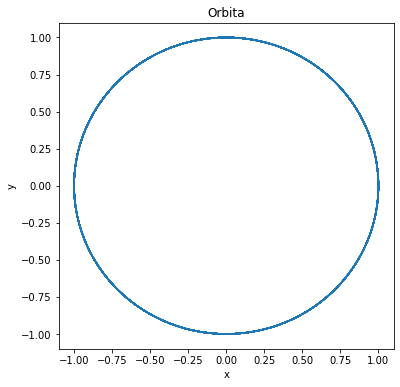

In [90]:
def func(U,t,G,M):
  r = np.sqrt(U[0]**2 + U[2]**2) 
  dU0dt = U[1]
  dU1dt = -G*M*U[0]/r**3
  dU2dt = U[3]
  dU3dt = -G*M*U[2]/r**3

  return np.array([dU0dt,dU1dt,dU2dt,dU3dt])
#parametros G,M
args = (1,1)
#tiempo
t = np.arange(0,100,0.001)
#condiciones iniciales x, vx, y, vy respectivamente 
U = np.array([1, 0, 0, 1])
#resolviendo con odeint
sol = integrate.odeint(func,U,t,args)
x, vx, y, vy = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

#gráfica de la orbita
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.title('Orbita')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv', sep=";")
df

In [65]:
df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1':'AnguloDeg'})
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".")

In [176]:
# df = df.astype({'AnguloDeg':'float'})
df['AnguloDeg'] = df['AnguloDeg'].astype(float)
#creamos la columna para los angulos radianes
rad = np.deg2rad(df['AnguloDeg'])
df = df.assign(AnguloRad = rad)

Tiempo[ms]


Text(0, 0.5, 'Angulo (grados)')

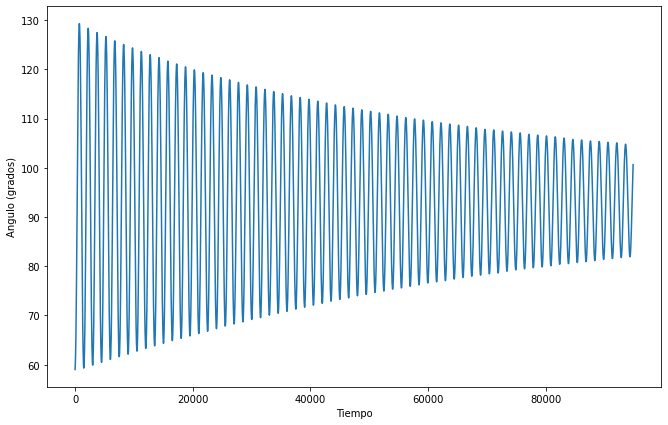

In [98]:
plt.figure(figsize=(11,7))
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'])
plt.xlabel('Tiempo')
plt.ylabel('Angulo (grados)')
#En la gráfica se puede ver que el pendulo tiene un movimiento oscilatorio amortiguado

Tiempo[ms]    24
AnguloDeg     22
AnguloRad     22
dtype: int64

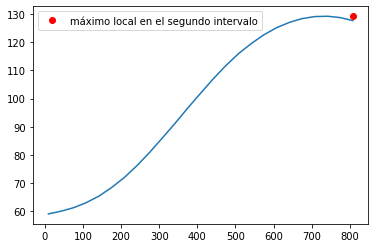

In [221]:
#intentando hallar el valor del ratio de decaimiento 'b, dado por b = ln(y(t0) / y(t1)) / (t1 - t0)
#con t0 y t1 el tiempo en 2 máximos locales consecutivos
plt.plot(df['Tiempo[ms]'][0:25],df['AnguloDeg'][0:25] )
pd.DataFrame.max(df[0:25])
plt.plot(df['Tiempo[ms]'][24],df['AnguloDeg'][22],'ro',label='máximo local en el primer intervalo')
plt.legend()
pd.DataFrame.idxmax(df[0:25])#index en el dataframe 

Tiempo[ms]    24
AnguloDeg     22
AnguloRad     22
dtype: int64

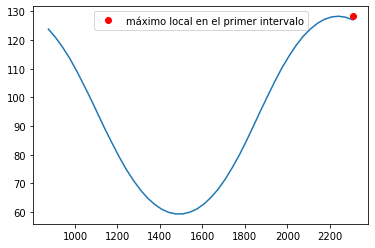

In [222]:
plt.plot(df['Tiempo[ms]'][26:70],df['AnguloDeg'][26:70] )
pd.DataFrame.max(df[26:70])
pd.DataFrame.idxmax(df[26:70])
plt.plot(df['Tiempo[ms]'][69],df['AnguloDeg'][67],'ro',label='máximo local en el segundo intervalo') 
plt.legend()
pd.DataFrame.idxmax(df[0:25])#index en el dataframe 

In [223]:
b = np.log(abs(df['AnguloDeg'][67] - df['AnguloDeg'][22])) / (df['Tiempo[ms]'][99] - df['Tiempo[ms]'][24])
b

-1.6046420915502246e-05

In [224]:
from scipy.optimize import curve_fit
def oscilador(t,A,omega,phi):
  return A*np.e**(-b*t) * np.sin(omega*t + phi)

popt, pcov = curve_fit(oscilador, df['Tiempo[ms]'], df['AnguloDeg'])
popt
print('''A = {A}
omega = {omega}
phi = {phi}
b = {b}'''.format(A = popt[0], omega= popt[1], phi = popt[2], b= b))

A = -0.6028970989286702
omega = 0.9999782402959645
phi = 2.425905368945313
b = -1.6046420915502246e-05
